In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [3]:
df = pd.read_csv(r"flights.csv",low_memory=False)

In [4]:
## Data Cleaning

In [5]:
df.shape

(5819079, 31)

In [6]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns


Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [8]:
delay_cols = [
    "AIRLINE_DELAY",
    "WEATHER_DELAY",
    "AIR_SYSTEM_DELAY",
    "SECURITY_DELAY",
    "LATE_AIRCRAFT_DELAY"
]

In [9]:
df[delay_cols] = df[delay_cols].fillna(0)

In [10]:
df = df[df["CANCELLED"] == 0]

In [11]:
df = df.dropna(subset=["ARRIVAL_DELAY"])

In [12]:
df["IS_DELAYED"] = (df["ARRIVAL_DELAY"] > 15).astype(int)

In [13]:
## Exploratory Data Analysis

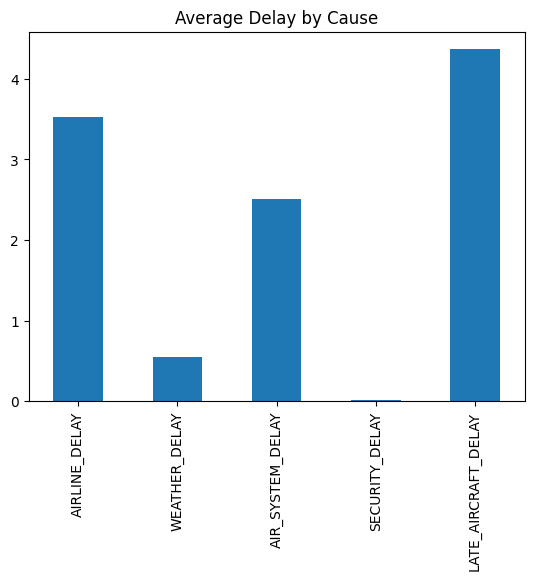

In [14]:
df[delay_cols].mean().plot(kind="bar")
plt.title("Average Delay by Cause")
plt.show()

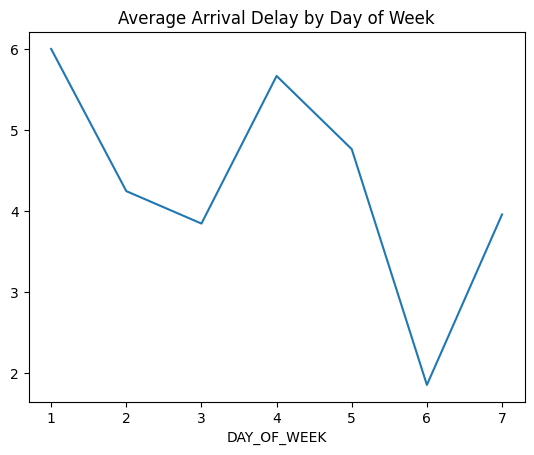

In [15]:
df.groupby("DAY_OF_WEEK")["ARRIVAL_DELAY"].mean().plot()
plt.title("Average Arrival Delay by Day of Week")
plt.show()

In [16]:
## Regression Modeling

In [17]:
X = df[delay_cols + ["MONTH", "DAY_OF_WEEK"]]
y = df["ARRIVAL_DELAY"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_pred = lr.predict(X_test)

In [21]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MAE: 7.850882062799659
RMSE: 9.997669358597248
R2: 0.9348856326680086


In [22]:
reg_features = delay_cols + ["MONTH", "DAY_OF_WEEK"]

coefficients = pd.DataFrame({
    "Feature": reg_features,
    "Coefficient": lr.coef_
})

coefficients

,Feature,Coefficient
0,AIRLINE_DELAY,1.042559
1,WEATHER_DELAY,1.033284
2,AIR_SYSTEM_DELAY,1.085476
3,SECURITY_DELAY,1.100223
4,LATE_AIRCRAFT_DELAY,1.059900
5,MONTH,-0.141613
6,DAY_OF_WEEK,-0.071413


In [23]:
X = df[delay_cols + ["MONTH", "DAY_OF_WEEK"]]
y = df["IS_DELAYED"]

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Accuracy: 1.0
F1 Score: 1.0
[[938008      0]
 [     0 204794]]


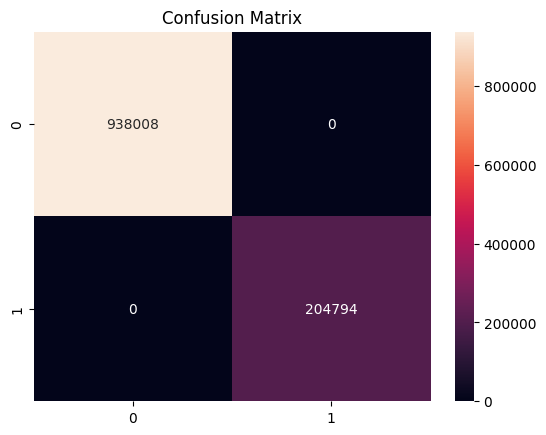

In [26]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [27]:
## Classification Modeling

In [28]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print("Decision Tree F1:", f1_score(y_test, y_pred))

Decision Tree F1: 0.9923598621284765


In [29]:
## Clustering Analysis

In [30]:
airport_df = df.groupby("ORIGIN_AIRPORT").agg({
    "WEATHER_DELAY": "mean",
    "AIRLINE_DELAY": "mean",
    "AIR_SYSTEM_DELAY": "mean",
    "ARRIVAL_DELAY": "mean",
    "IS_DELAYED": "mean"
}).reset_index()

In [31]:
X_cluster = airport_df.drop("ORIGIN_AIRPORT", axis=1)

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42)
airport_df["CLUSTER"] = kmeans.fit_predict(X_cluster_scaled)
airport_df["CLUSTER"].value_counts()

CLUSTER
0    326
1    274
2     28
Name: count, dtype: int64

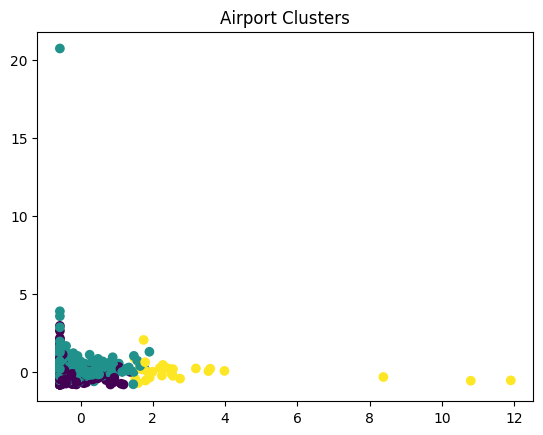

In [33]:
plt.scatter(X_cluster_scaled[:, 0], X_cluster_scaled[:, 1], c=airport_df["CLUSTER"])
plt.title("Airport Clusters")
plt.show()

In [34]:
cluster_summary = airport_df.groupby("CLUSTER").mean(numeric_only=True)
cluster_summary

,WEATHER_DELAY,AIRLINE_DELAY,AIR_SYSTEM_DELAY,ARRIVAL_DELAY,IS_DELAYED
CLUSTER,,,,,
0,0.188000,2.338039,1.344868,-1.341595,0.103620
1,0.419872,4.107684,3.164745,6.714954,0.189316
2,2.557469,3.318748,2.076156,4.337907,0.150499


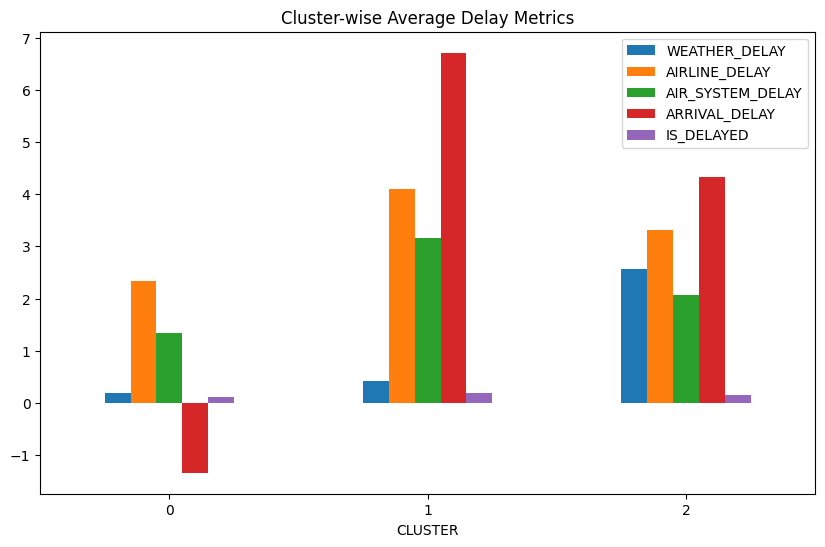

In [35]:
cluster_summary.plot(kind="bar", figsize=(10,6))
plt.title("Cluster-wise Average Delay Metrics")
plt.xticks(rotation=0)
plt.show()

In [36]:
## Principal Component Analysis

In [37]:
X = df[delay_cols]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.22351475 0.202261  ]


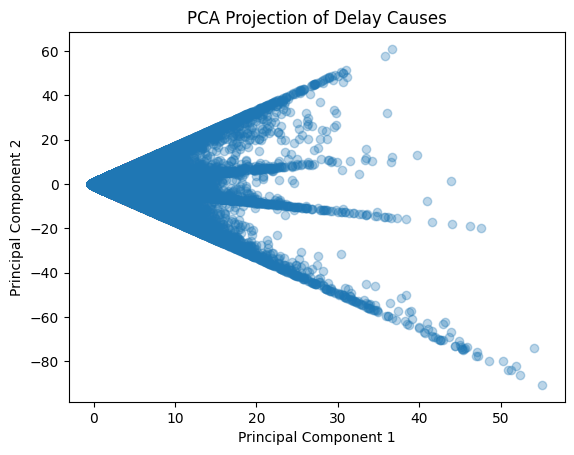

In [38]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3)
plt.title("PCA Projection of Delay Causes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
